PRAVEENA ANAND [CH.SC.U4CSE23044]

**LOGISTIC REGRESSION:**

**Exam Ranks Dataset:**

Importing Required Libraries:

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import urllib

Download and Load the Dataset:

In [2]:
url = "https://stats.idre.ucla.edu/stat/stata/dae/binary.dta"
data = pd.read_stata(url)

Show the First Few Rows of the Data & the Columns Present:

In [7]:
print(data.head())
print(data.columns)

   admit    gre   gpa  rank
0    0.0  380.0  3.61   3.0
1    1.0  660.0  3.67   3.0
2    1.0  800.0  4.00   1.0
3    1.0  640.0  3.19   4.0
4    0.0  520.0  2.93   4.0
Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')


Checking for Any Null Values in the Dataset:

In [8]:
data.isnull().sum()

,0
admit,0
gre,0
gpa,0
rank,0


Assigning Dependent and Independent Variables:

Independent Variables: gre (GRE score), gpa (GPA), prestige (institution prestige)

Dependent Variable: admit (whether admitted or not)

In [9]:
feature_cols = ['gre', 'gpa', 'rank']
x = data[feature_cols]
y = data['admit']

Adding Constant to the Independent Variables for the Intercept in the Model

In [10]:
x = sm.add_constant(x)

Splitting the Dataset into Training and Testing Dataset:

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(320, 4)

(320,)

(80, 4)

(80,)

Fitting the Logistic Regression Model

In [16]:
model= LogisticRegression (solver='lbfgs', max_iter=1000)

In [17]:
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

Evaluation Metrics:

In [18]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_mat)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy_score)
print('Accuracy in Percentage:', int(accuracy_score * 100), '%')

Confusion Matrix:
 [[50  4]
 [23  3]]
Accuracy Score: 0.6625
Accuracy in Percentage: 66 %


Displaying the Confusion Matrix in a Tabular Form:

<Axes: xlabel='Predicted', ylabel='Actual'>

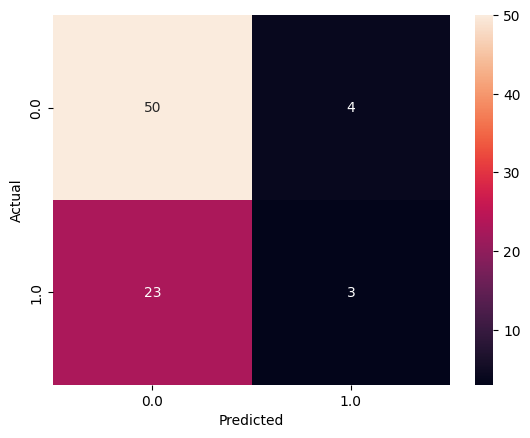

In [19]:
conf_mat_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_mat_df, annot=True)

Logistic Regression Summary:

In [20]:
logit_model = sm.Logit(y, x)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.574302
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Thu, 24 Jul 2025   Pseudo R-squ.:                 0.08107
Time:                        04:04:20   Log-Likelihood:                -229.72
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 8.207e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4495      1.133     -3.045      0.002      -5.670      -1.229
gre            0.0023      0.